# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

### Background

*Data*

| Identifier | Description | 
| :--------: | :---------: | 
| student_data        |  data frame for imported data    |
| n_students | total number of students |
| n_features | number of features in dataset |
| n_passed | number of students who passed |
| n_failed | number of students who failed |
| grad_rate | rate of students who graduate |
| feature_cols | list of feature names |
| target_col | identifies target column 'passed' |
| X_all | feature data |
| y_all | target data |
| output | dataframe containing preprocessed features |

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

### Answer:

This problem would be considered **binary classification** because the goal is to identify (and classify) the students whom need intervention to prevent failure. 
- Classification takes discrete class labels as inputs and evaluates a decision boundary. The evaluation is based on accuracy. 



## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import statements 
# Libraries
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time

# Libraries for metric functions
from sklearn.metrics import (f1_score, accuracy_score, make_scorer, fbeta_score, 
                             brier_score_loss, precision_score, recall_score)
from sklearn.metrics import classification_report, confusion_matrix

# Libraries used for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import neighbors
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Other utilities
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Import functions from other python document
from student_functions import (preprocess_features, train_classifier, train_classifier_noP,
                               predict_labels, predict_labels_noP, train_predict, 
                               train_predict_noP, train_predict_print,
                               plot_confusion_matrix, plot_calibration_curve)

# Pretty display for notebooks
%matplotlib inline
from IPython.display import display

In [3]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

# create another dataframe for playing around with!
data = pd.read_csv('student-data.csv', header=0)
outcome_passed = data['passed']
outcome_passed_num = outcome_passed.replace(['yes', 'no'], [1,0])
features = data.drop('passed', axis = 1)
features_num = preprocess_features(features)

Student data read successfully!


#### Displaying the first 5 indexes will give us a feel for the features and corresponding data

In [3]:
student_data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes


In [4]:
# @student_data is a dictionary, so lets explore our keys!
student_data.keys()

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')

#### Exploring the data with sklearn: 

In [5]:
# display(student_data.info())
print(features_num.describe())

        school_GP   school_MS       sex_F       sex_M         age   address_R  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.883544    0.116456    0.526582    0.473418   16.696203    0.222785   
std      0.321177    0.321177    0.499926    0.499926    1.276043    0.416643   
min      0.000000    0.000000    0.000000    0.000000   15.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000   16.000000    0.000000   
50%      1.000000    0.000000    1.000000    0.000000   17.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000   18.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000   22.000000    1.000000   

        address_U  famsize_GT3  famsize_LE3   Pstatus_A     ...      \
count  395.000000   395.000000   395.000000  395.000000     ...       
mean     0.777215     0.711392     0.288608    0.103797     ...       
std      0.416643     0.453690     0.453690    0.305384  

#### With the `student_data.info()` output we can speculate a few things: 
- We are working with a pandas dataframe
- The dataframe is indexed 0 to 394
- There are **395 data entries** (rows) and **31 features** (columns)
    - Therefor, our dataframe is 395 rows x 31 columns
- Datatypes: there are 13 features of type int and 18 features which act as objects
- Student Ages
    - The oldest test subject is 22 and the youngest is 15
    - The average subject from the test was 17
- Absences
    - The maximum absences among the test subjects was 75 and the minimum was 0
    - The average from the test was 4

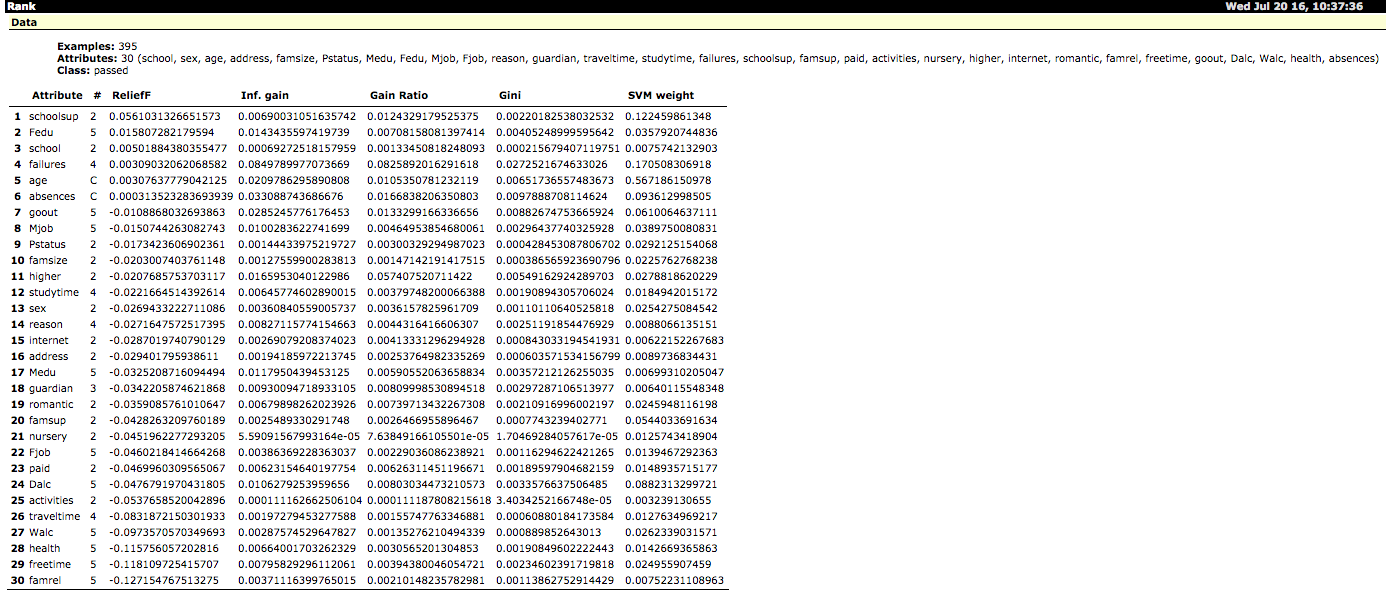

In [8]:
from IPython.display import Image
Image("features_rank.png")

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [18]:
# Calculate number of students
n_students = student_data.shape[0]

# Calculate number of features
n_features = student_data.shape[1]

# Calculate passing students
n_passed =len(student_data[student_data.passed == "yes"])

# Calculate failing students
n_failed = len(student_data[student_data.passed == "no"])

# Calculate graduation rate
grad_rate = float (n_passed) / n_students *100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [19]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1]

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()
#print X_all.info()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

In [20]:
# Create an instance of target labels in binary format
y_all_num = y_all.replace(['yes', 'no'], [1,0])
# Check that @y_all_num is binary now
print y_all_num.head()

0    0
1    0
2    1
3    1
4    1
Name: passed, dtype: int64


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [21]:
# def preprocess_features(X):
#     ''' Preprocesses the student data and converts non-numeric binary variables into
#         binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
#     # Initialize new output DataFrame
#     output = pd.DataFrame(index = X.index)

#     # Investigate each feature column for the data
#     for col, col_data in X.iteritems():
        
#         # If data type is non-numeric, replace all yes/no values with 1/0
#         if col_data.dtype == object:
#             col_data = col_data.replace(['yes', 'no'], [1, 0])

#         # If data type is categorical, convert to dummy variables
#         if col_data.dtype == object:
#             # Example: 'school' => 'school_GP' and 'school_MS'
#             col_data = pd.get_dummies(col_data, prefix = col)  
        
#         # Collect the revised columns
#         output = output.join(col_data)
    
#     return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
# Check that features are preprocessed (if you want!)
# print X_all.head()





Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


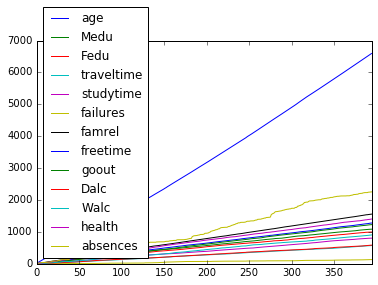

In [22]:
from pandas.tools.plotting import radviz

# plt.figure(figsize=(20,10))
# radviz(X_all, 'Dalc')

# plt.figure()
fig = features.cumsum()
fig.plot();

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [23]:
# Already imported----
# from sklearn.cross_validation import train_test_split
# ----

# Set the number of training points
# I decided to be more specific with my training points, calculating 75% of testing points and
# cast it to int so that the result is a whole number
num_train = int(n_students * 0.75)

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, 
                                                                     test_size=num_test, 
                                                                     train_size=num_train, 
                                                                     random_state=0)

# find a feature normalization: 
X_norm = np.mean(X_train, axis = 0)

# Show the results of the split
print "Features...."
print "Training set has {} samples with shape {}".format(X_train.shape[0], X_train.shape)
print "Testing set has {} samples with shape {}\n".format(X_test.shape[0], X_test.shape)
print "Labels..."
print "Training set has a shape of {}".format(y_train.shape)
print "Testing set has a shape of {}".format(y_test.shape)

Features....
Training set has 296 samples with shape (296, 48)
Testing set has 99 samples with shape (99, 48)

Labels...
Training set has a shape of (296,)
Testing set has a shape of (99,)


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*


### *Model A: Support Vector Machines*
Support vector machines is a supervised learning technique that is often used for classiciation. Support vectors are often used to calculate an optimal hyperplane by classifying training data into categorical functions. The algorithm then learns to assign new examples to a corresponding category of relating features. 

The **strengths** of using SVMs are:
- Highly effective with large datasets
- Application versatality and ability to apply custom Kernel functions or the Kernel trick for domain knowledge

The **weaknesses** to using SVMs are: 
- Requires a developed kernel function

### *Model B: Nearest Neighbor*
The nearest neighbor algorithm offers a simple learning method for classification data using instance based learning. (Though it also can be used for unsupervised learning). 

The **strengths** of using the nearest neighbor algorithm are:
- The simplicity of the model can be quick due to local approximation
- The cost of the learning process is minimal
- Accuracy increases and weights can be used to 'smooth' 

The **weakness** of using k-nearest neighbor are:
- Expense: The algorithm can be expensive when implementing on large datasets
- Results can be subject to bias and underfitting
- The curse of dimensionality is highly exibited in the model

### *Model C: Decision Tree*
A decision tree mdoel offers an intuitive model to split the model 

The **benefits** of using a decision tree are: 
- Little computation required to perform classification on model
- Able to handle categorical and continuous variables
- Identify important features

The **weaknesses** of using a decision tree are: 
- Sensistivity to overfitting and underfitting data
- Bins may introduce bias
- May lack human reasoning or intuitive splitting
- Can be expensive for large datasets or for many features 
    - `cost = O(n^n)

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [24]:
# Functions for training and testing
# As per udacity guidelines :)

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    train_time = end - start
    
    # Print the results
    print "Trained model in \t\t\t{:.4f}".format(train_time)
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in \t\t\t{:.4f}".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: \t\t{:.4f}".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: \t\t\t{:.4f}".format(predict_labels(clf, X_test, y_test))

In [25]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Functions for training and testing
# Functions perform same operations as the above functions but also identify variables for inbetween steps
# @ train_classifier_noP: stands for train classifier no print


def train_classifier_noP(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock, return the time it takes
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Store and return results
    train_time = end - start # variable @train_time
    return train_time # return variable @train_time: the time it takes to fit/ train the model

def predict_labels_noP(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    # Start the clock, make predictions, then stop the clock, return the time it takes with f1 scores
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Store calculated variables
    # variable @predict_time
    predict_time = end - start 
    # variable @predict_f1_score
    predict_f1_score = f1_score(target.values, y_pred, pos_label='yes')
    
    # return variables @predict_time and @predict_f1_score
    return predict_time, predict_f1_score


def train_predict_noP(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Training time
    tc = train_classifier_noP(clf, X_train, y_train)
    
    # Training set
    pl_1 = predict_labels_noP(clf, X_train, y_train)
    
    # Test set
    pl_2 = predict_labels_noP(clf, X_test, y_test)
    
    return tc, pl_1[0], pl_1[1], pl_2[0], pl_2[1]


def train_predict_print(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score, 
    format and print the results. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    tc = train_classifier_noP(clf, X_train, y_train)
    print "Trained model in \t\t\t\t\t{:.4f}".format(tc)
    
    # Training set
    pl_1 = predict_labels_noP(clf, X_train, y_train)
    print "Made predictions on training set in: \t\t\t{:.4f}".format(pl_1[0])
    print "F1 score for training set: \t\t\t\t{:.4f}".format(pl_1[1])
    
    # Test set
    pl_2 = predict_labels_noP(clf, X_test, y_test)
    print "Made predictions on test set in: \t\t\t{:.4f}".format(pl_2[0])
    print "F1 score for test set: \t\t\t\t\t{:.4f}".format(pl_2[1])

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [26]:
# Already imported ----
# from sklearn.svm import SVC
# from sklearn import neighbors
# from sklearn import tree
# from sklearn.metrics import accuracy_score
# ----

# Classifier A: Support Vector Machine Algorithm
a = "Support Vector Machine"
# Classifier B: Nearest Neighbor Algorithm
b = "Nearest Neighbor Algorithm"
# Classifier C: Decision Tree Algorithm
c = "Decision Tree Algorithm"
# Classifier D: Logistic Regression
d = "Logistic Regression"


# Initialize the three models
clf_A = SVC(kernel='linear', random_state=0)
clf_B = neighbors.KNeighborsClassifier()
clf_C = tree.DecisionTreeClassifier(random_state=0)
clf_D = LogisticRegression(random_state=0)
clf_E = GaussianNB()


# Set up the training set sizes
X_train_100 = X_train[:95]
y_train_100 = y_train[:95]

X_train_200 = X_train[:195]
y_train_200 = y_train[:195]

X_train_300 = X_train[:295]
y_train_300 = y_train[:295]

In [27]:
# Execute the 'train_predict' function for each classifier and each training set size

def train_pred_all(clf):
    '''train and predict a model on ALL training sizes'''
    my100 = train_predict_print(clf, X_train_100, y_train_100, X_test, y_test)
    #print my100
    print
    my200 = train_predict_print(clf, X_train_200, y_train_200, X_test, y_test)
    #print my200
    print
    my300 = train_predict_print(clf, X_train_300, y_train_300, X_test, y_test)
    #print my300
    print


def clf_stats_all(clf, clf_info):
    '''Get and print calculated statistics for a model'''
    print "Statistics for {} model. . .".format(clf.__class__.__name__)
    print "Mean training time: {:,.4f}".format(np.mean(clf_info[0]))
    print "Mean prediction time: {:,.4f}".format(np.mean(clf_info[1]))
    print "Mean F1 score for training sets: {:,.4f}".format(np.mean(clf_info[2]))
    print "Mean testing time: {:,.4f}".format(np.mean(clf_info[3]))
    print "Mean F1 score for test sets: {:,.4f}".format(np.mean(clf_info[4]))

In [28]:

def clf_report(clf):
    '''Calculates classification report for a model'''
    print "\nClassification Report!"
    print classification_report(y_test, clf.predict(X_test))


def plot_mat(clf):
    '''Computes confusion matrix with and without normalization'''
    # Compute confusion matrix
    #fig = plt.figure()
    cm = confusion_matrix(y_test, clf.predict(X_test), labels=["yes","no"])
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm)

    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

    plt.show()

## *Support Vector Machine:*
Model performance for training sets of sizes 100, 200, and 296.

Support Vector Machines (SVM's) can be used in the case of both classification and regression. In the case of classification, an SVM can be prove helpful when the data is linearly seperatable. An SVM algorithm can go further to seperate the data into vectors by means of a kernel where a decision surface is maximized to distinguish differences within features and classes. 

In [29]:
# Verify parameters
print clf_A.get_params()

{'kernel': 'linear', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': 0, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}


Training a SVC using a training set size of 95. . .
Trained model in 					0.0135
Made predictions on training set in: 			0.0012
F1 score for training set: 				0.8730
Made predictions on test set in: 			0.0007
F1 score for test set: 					0.7368

Training a SVC using a training set size of 195. . .
Trained model in 					0.0117
Made predictions on training set in: 			0.0019
F1 score for training set: 				0.8582
Made predictions on test set in: 			0.0010
F1 score for test set: 					0.7746

Training a SVC using a training set size of 295. . .
Trained model in 					0.0436
Made predictions on training set in: 			0.0047
F1 score for training set: 				0.8430
Made predictions on test set in: 			0.0014
F1 score for test set: 					0.7778

[(0.005418062210083008, 0.001065969467163086, 0.87301587301587291, 0.0007178783416748047, 0.73684210526315785), (0.011871099472045898, 0.0023059844970703125, 0.85818181818181816, 0.0010828971862792969, 0.77464788732394363), (0.03467893600463867, 0.003294944763183

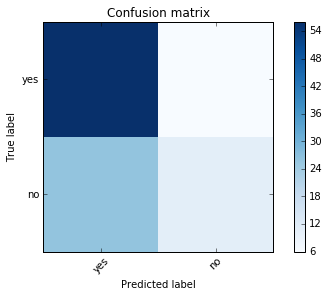

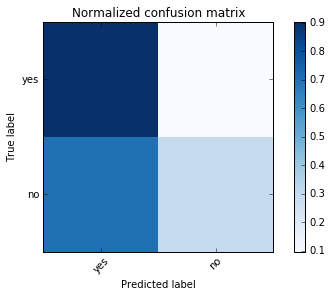

In [30]:
# Run functions for @clf_A - Support Vector Machine
# Train and predict @clf_A on training ALL predefined trainng set sizes
train_pred_all(clf_A)



clf_A_arr = [train_predict_noP(clf_A, X_train_100, y_train_100, X_test, y_test),
             train_predict_noP(clf_A, X_train_200, y_train_200, X_test, y_test),
             train_predict_noP(clf_A, X_train_300, y_train_300, X_test, y_test)]

print clf_A_arr

#Print array of values
for i in clf_A_arr[2]:
    print "%.4f" % i

# Create array of models results
clf_A_info = [[0.0017, 0.0039, 0.0073],
              [0.0009, 0.0028, 0.0055],
              [0.8759, 0.8759, 0.8707],
              [0.0008, 0.0008, 0.0030],
              [0.7712, 0.7712, 0.7682]]

print "\n-----------------------------------------------"
# Print mean results over thee three training sets
clf_stats_all(clf_A, clf_A_info)
print "-----------------------------------------------"


# Print classification report
clf_report(clf_A)

# Print confusion matrix and plot
plot_mat(clf_A)

## *K Nearest Neighbor Classifier:*
Model performance for training sets of sizes 95, 195, and 295.

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

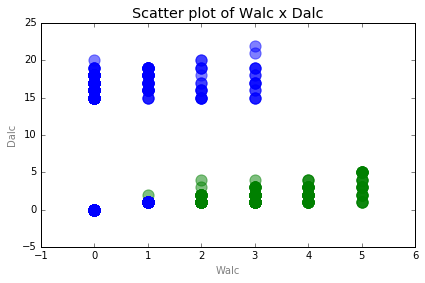

In [32]:
p_x = student_data['Walc'], student_data['passed']=='yes'
p_y = student_data['Dalc'], student_data['passed']=='yes'

fp_x = student_data['failures'], student_data['passed']=='yes'
fp_y = student_data['age'], student_data['passed']=='yes'

f_x = student_data['failures'], student_data['passed']=='no'
f_y = student_data['age'], student_data['passed']=='no'
student_data['Dalc'], student_data['passed']=='yes'
f_x, f_y, f_z = student_data['Walc'], student_data['Dalc'], student_data['passed']=='yes'

fig = plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(1)

# Label the axes
ax1.set_xlabel('Walc', alpha=0.5)
ax1.set_ylabel('Dalc', alpha=0.5)

# ax1.scatter(p_x, p_y, alpha=0.9, s=125, color="red")
ax1.scatter(f_x, f_y, alpha=0.5, s=125, color="green")
ax1.scatter(fp_x, fp_y, alpha=0.5, s=125, color="blue")

plt.style.use('ggplot')
plt.title("Scatter plot of Walc x Dalc")

fig.tight_layout()
plt.show()

In [33]:
# Verify parameters
print clf_B.get_params()

{'n_neighbors': 5, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'uniform', 'leaf_size': 30}


Training a KNeighborsClassifier using a training set size of 95. . .
Trained model in 					0.0012
Made predictions on training set in: 			0.0107
F1 score for training set: 				0.7812
Made predictions on test set in: 			0.0017
F1 score for test set: 					0.7338

Training a KNeighborsClassifier using a training set size of 195. . .
Trained model in 					0.0008
Made predictions on training set in: 			0.0036
F1 score for training set: 				0.8592
Made predictions on test set in: 			0.0022
F1 score for test set: 					0.7183

Training a KNeighborsClassifier using a training set size of 295. . .
Trained model in 					0.0009
Made predictions on training set in: 			0.0064
F1 score for training set: 				0.8733
Made predictions on test set in: 			0.0046
F1 score for test set: 					0.7448


-----------------------------------------------
Statistics for KNeighborsClassifier model. . .
Mean training time: 0.0011
Mean prediction time: 0.0051
Mean F1 score for training sets: 0.8379
Mean testing time: 0

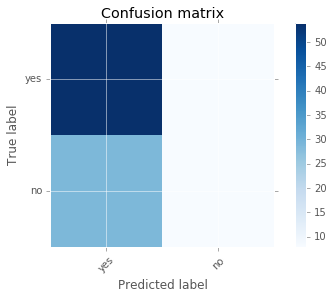

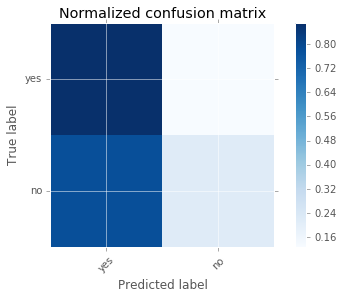

In [34]:
# Run functions for @clf_B - K Nearest Neighbor Classifier
# Train and predict @clf_B on training ALL predefined trainng set sizes
train_pred_all(clf_B)

# Create array of models results
clf_B_info = [[0.0012, 0.0007, 0.0014],
              [0.0024, 0.0037, 0.0093],
              [0.7812, 0.8592, 0.8733],
              [0.0015, 0.0034, 0.0091],
              [0.7338, 0.7183, 0.7448]]

print "\n-----------------------------------------------"
# Print mean results over thee three training sets
clf_stats_all(clf_B, clf_B_info)
print "-----------------------------------------------"

# Print classification report
clf_report(clf_B)

# Print confusion matrix and plot
plot_mat(clf_B)

## *Decision Tree Classifier:*
Model performance for training sets of sizes 95, 195, and 295.

In [35]:
# Verify parameters
print clf_C.get_params()

{'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 0, 'max_features': None, 'max_depth': None, 'class_weight': None}


Training a DecisionTreeClassifier using a training set size of 95. . .
Trained model in 					0.0016
Made predictions on training set in: 			0.0068
F1 score for training set: 				1.0000
Made predictions on test set in: 			0.0004
F1 score for test set: 					0.7302

Training a DecisionTreeClassifier using a training set size of 195. . .
Trained model in 					0.0018
Made predictions on training set in: 			0.0005
F1 score for training set: 				1.0000
Made predictions on test set in: 			0.0003
F1 score for test set: 					0.7259

Training a DecisionTreeClassifier using a training set size of 295. . .
Trained model in 					0.0021
Made predictions on training set in: 			0.0003
F1 score for training set: 				1.0000
Made predictions on test set in: 			0.0003
F1 score for test set: 					0.7500


-----------------------------------------------
Statistics for DecisionTreeClassifier model. . .
Mean training time: 0.0018
Mean prediction time: 0.0003
Mean F1 score for training sets: 1.0000
Mean testing

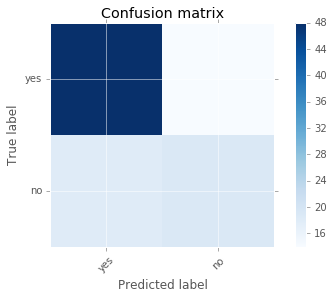

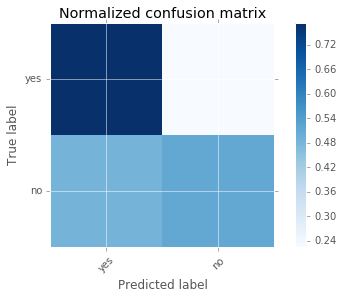

In [36]:
# Run functions for @clf_C - Decision Tree Classifier
# Train and predict @clf_C on training ALL predefined trainng set sizes
train_pred_all(clf_C)

# Create array of models results
clf_C_info = [[0.0019, 0.0015, 0.0021],
              [0.0004, 0.0002, 0.0003],
              [1.0, 1.0, 1.0,],
              [0.0003, 0.0003, 0.0003],
              [0.7302, 0.7259, 0.7500]]

print "\n-----------------------------------------------"
# Print mean results over thee three training sets
clf_stats_all(clf_C, clf_C_info)
print "-----------------------------------------------"

# Print classification report
clf_report(clf_C)

# Print confusion matrix and plot
plot_mat(clf_C)

## *Logistic Regression:*
Model performance for training sets of sizes 95, 195, and 295.

In [37]:
# Verify parameters
print clf_D.get_params()

{'warm_start': False, 'C': 1.0, 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': 0, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None}


Training a LogisticRegression using a training set size of 95. . .
Trained model in 					0.0120
Made predictions on training set in: 			0.0004
F1 score for training set: 				0.8346
Made predictions on test set in: 			0.0003
F1 score for test set: 					0.7259

Training a LogisticRegression using a training set size of 195. . .
Trained model in 					0.0025
Made predictions on training set in: 			0.0004
F1 score for training set: 				0.8333
Made predictions on test set in: 			0.0003
F1 score for test set: 					0.7714

Training a LogisticRegression using a training set size of 295. . .
Trained model in 					0.0048
Made predictions on training set in: 			0.0004
F1 score for training set: 				0.8421
Made predictions on test set in: 			0.0004
F1 score for test set: 					0.7801


-----------------------------------------------
Statistics for LogisticRegression model. . .
Mean training time: 0.0021
Mean prediction time: 0.0004
Mean F1 score for training sets: 0.8367
Mean testing time: 0.0003
Me

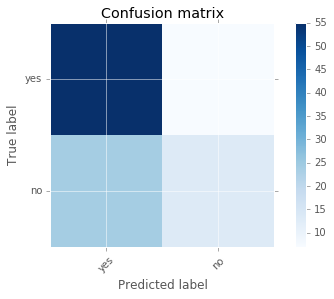

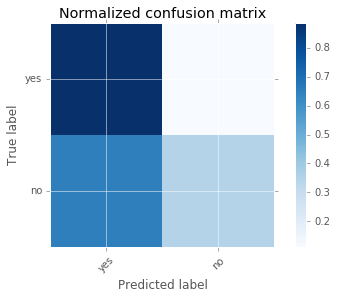

In [38]:
# Run functions for @clf_D - Logistic Regression
# Train and predict @clf_D on training ALL predefined trainng set sizes
train_pred_all(clf_D)

# Create array of models results
clf_D_info = [[0.0021, 0.0002, 0.0040],
              [0.0005, 0.0003, 0.0004],
              [0.8346, 0.8333, 0.8421,],
              [0.0002, 0.0005, 0.0002],
              [0.7259, 0.7714, 0.7801]]

print "\n-----------------------------------------------"
# Print mean results over thee three training sets
clf_stats_all(clf_D, clf_D_info)
print "-----------------------------------------------"

# Print classification report
clf_report(clf_D)

# Print confusion matrix and plot
plot_mat(clf_D)

## *Gaussian Naive Bayes:*
Model performance for training sets of sizes 95, 195, and 295.

In [39]:
# Run functions for @clf_C - Decision Tree Classifier
# Train and predict @clf_C on training ALL predefined trainng set sizes
train_pred_all(clf_E)

# Create array of models results
clf_E_info = [[0.0023, 0.0010, 0.0015],
              [0.0008, 0.0005, 0.0006],
              [0.8387, 0.8417, 0.8131,],
              [0.0004, 0.0004, 0.0004],
              [0.7391, 0.7391, 0.7465]]

print "\n-----------------------------------------------"
# Print mean results over thee three training sets
clf_stats_all(clf_E, clf_E_info)
print "-----------------------------------------------"

# Print classification report
clf_report(clf_E)

# Print confusion matrix and plot
# plot_mat(clf_E)

Training a GaussianNB using a training set size of 95. . .
Trained model in 					0.0020
Made predictions on training set in: 			0.0071
F1 score for training set: 				0.8387
Made predictions on test set in: 			0.0005
F1 score for test set: 					0.7391

Training a GaussianNB using a training set size of 195. . .
Trained model in 					0.0011
Made predictions on training set in: 			0.0005
F1 score for training set: 				0.8417
Made predictions on test set in: 			0.0008
F1 score for test set: 					0.7111

Training a GaussianNB using a training set size of 295. . .
Trained model in 					0.0012
Made predictions on training set in: 			0.0005
F1 score for training set: 				0.8131
Made predictions on test set in: 			0.0005
F1 score for test set: 					0.7465


-----------------------------------------------
Statistics for GaussianNB model. . .
Mean training time: 0.0016
Mean prediction time: 0.0006
Mean F1 score for training sets: 0.8312
Mean testing time: 0.0004
Mean F1 score for test sets: 0.741

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

### Classifer 1 - Support Vector Machine

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 95                |      0.0017             |           0.0009       |    0.8759        |         0.7712  |
| 195               |        0.0039           |            0.0015      |    0.8716        |    0.7712       |
| 295               |       0.0076            |          0.0019        |    0.8707        |    0.7682       |
| **MEAN**          |     *0.0043*            |    *0.0015*            |   *0.8742*       |     *0.7702*    |

### Classifer 2 - K Nearest Neighbor Classifier

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
|95                 |       0.0016            |    0.0014              |   0.7812         |     0.7338      |
| 195               |     0.0010              |    0.0020              |   0.8592         |     0.7183      |
| 295               |       0.0009            |    0.0027              |   0.8733         |     0.7448      |
| **MEAN**          |       *0.0011*          |    *0.0047*            |   *0.8379*       |    *0.7323*     |

### Classifer 3 - Decision Tree Classifier

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 195               |          0.0018         |         0.0002         |      1.0000      |     0.7302      |
| 195               |          0.0014         |         0.0002         |      1.0000      |     0.7259      |
| 195               |          0.0029         |         0.0003         |      1.0000      |     0.7534      |
| **MEAN**          |       *0.0018*          |    *0.0003*            |   *1.0000*       |    *0.7323*     |

### Classifer 4 - Linear Regression Classifier

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 95               |          0.0025         |         0.0003         |      0.8346      |     0.7259      |
| 195               |          0.0019         |         0.0004         |      0.8333      |     0.7714      |
| 295               |          0.0039         |         0.0002         |      0.8421      |     0.7176      |
| **MEAN**          |       *0.0028*          |    *0.0003*            |   *0.8367*       |    *0.7383*     |

### Classifer 5 - Guassian Naive Bayes

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 95               |          0.0022         |         0.0004         |      0.8387      |     0.7391      |
| 195               |          0.0013         |         0.0005         |      0.8417      |     0.7111      |
| 295               |          0.0015         |         0.0006         |      0.8131      |     0.7651      |
| **MEAN**          |       *0.0016*          |    *0.0003*            |   *0.8312*       |    *0.7384*     |

In [40]:
def get_comparison_info(name, i):
    '''Computes and prints mean results by training size to compare models'''
    print name
    print "\tSVC: \t\t\t\t{:,.4f}".format(np.mean(clf_A_info[i]))
    print "\tKNN: \t\t\t\t{:,.4f}".format(np.mean(clf_B_info[i]))
    print "\tDT: \t\t\t\t{:,.4f}".format(np.mean(clf_C_info[i]))
    print "\tLR: \t\t\t\t{:,.4f}".format(np.mean(clf_D_info[i]))
    print "\tNB: \t\t\t\t{:,.4f}".format(np.mean(clf_E_info[i]))


get_comparison_info("Mean Training Time:", 1)
print "\tLowest mean training time: \n\t=> Decision Tree\n"
get_comparison_info("Mean Prediction Time for Training Set:", 1)
print "\tLowest mean prediction time for training: \n\t=> Decision tree\n"
get_comparison_info("Mean F1 Score for Training Set:", 2)
print "\tHighest mean F1 score for training: \n\t=> SVC*\n"
get_comparison_info("Mean Prediction Time for Test Set:", 3)
print "\tLowest mean prediction time for testing: \n\t=> DT, LR\n"
get_comparison_info("Mean F1 Score for Test Set:", 4)
print "\tHighest mean F1 score for testing: \n\t=> SVC"

Mean Training Time:
	SVC: 				0.0031
	KNN: 				0.0051
	DT: 				0.0003
	LR: 				0.0004
	NB: 				0.0006
	Lowest mean training time: 
	=> Decision Tree

Mean Prediction Time for Training Set:
	SVC: 				0.0031
	KNN: 				0.0051
	DT: 				0.0003
	LR: 				0.0004
	NB: 				0.0006
	Lowest mean prediction time for training: 
	=> Decision tree

Mean F1 Score for Training Set:
	SVC: 				0.8742
	KNN: 				0.8379
	DT: 				1.0000
	LR: 				0.8367
	NB: 				0.8312
	Highest mean F1 score for training: 
	=> SVC*

Mean Prediction Time for Test Set:
	SVC: 				0.0015
	KNN: 				0.0047
	DT: 				0.0003
	LR: 				0.0003
	NB: 				0.0004
	Lowest mean prediction time for testing: 
	=> DT, LR

Mean F1 Score for Test Set:
	SVC: 				0.7702
	KNN: 				0.7323
	DT: 				0.7354
	LR: 				0.7591
	NB: 				0.7416
	Highest mean F1 score for testing: 
	=> SVC


In [41]:
print "Support Vector Machine Scores..."
print "Train accuracy %f" %clf_A.score(X_train,y_train)
print "Test accuracy %f"%clf_A.score(X_test,y_test)

print "\nNearest Neighbor Classifier..."
print "Train accuracy %f" %clf_B.score(X_train,y_train)
print "Test accuracy %f"%clf_B.score(X_test,y_test)

print"\nDecision Tree Classifier..."
print "Train accuracy %f" %clf_C.score(X_train,y_train)
print "Test accuracy %f"%clf_C.score(X_test,y_test)

print"\nLinear Regression Classifier..."
print "Train accuracy %f" %clf_D.score(X_train,y_train)
print "Test accuracy %f"%clf_D.score(X_test,y_test)

print"\nNaive Bayes Classifier..."
print "Train accuracy %f" %clf_E.score(X_train,y_train)
print "Test accuracy %f"%clf_E.score(X_test,y_test)

Support Vector Machine Scores...
Train accuracy 0.763514
Test accuracy 0.676768

Nearest Neighbor Classifier...
Train accuracy 0.810811
Test accuracy 0.626263

Decision Tree Classifier...
Train accuracy 1.000000
Test accuracy 0.676768

Linear Regression Classifier...
Train accuracy 0.766892
Test accuracy 0.686869

Naive Bayes Classifier...
Train accuracy 0.750000
Test accuracy 0.636364


Automatically created module for IPython interactive environment


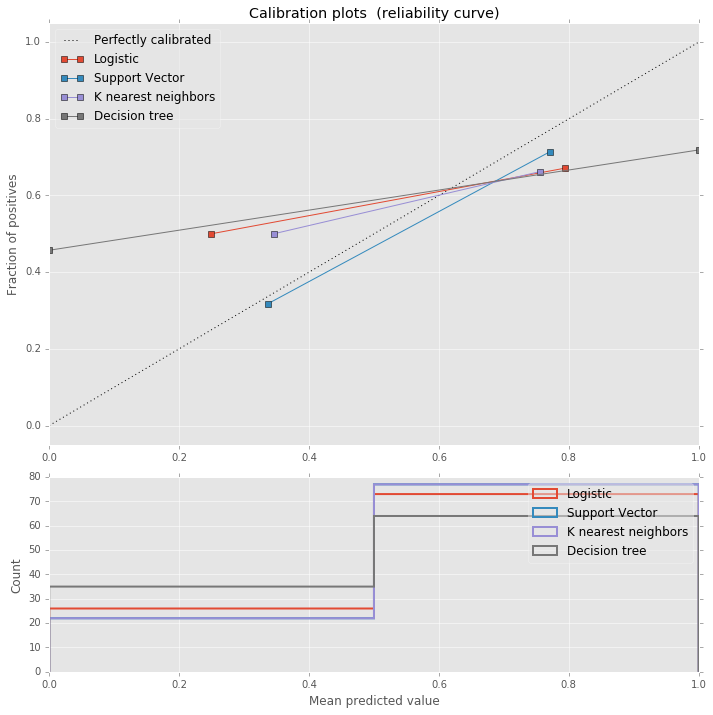

In [42]:
print(__doc__)

# Adapted from scikit learn documentation
# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

# Create instances of training and testing data
# For simplicity purposes, I choose to use a training size of 95 and 
# mirror the test/ training data
X_train_cal = X_train_100
X_test_cal = X_test
y_train_cal = y_train_100
y_test_cal = y_test

# Create classifiers
clf_lr = LogisticRegression() # Threw in a regression model as baseline
clf_svc = SVC(random_state=0)
clf_knn = neighbors.KNeighborsClassifier()
clf_tree = tree.DecisionTreeClassifier(random_state=0)
gnb = GaussianNB()
#rfc = RandomForestClassifier(n_estimators=100)


###############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_lr, 'Logistic'),
                  (clf_svc, 'Support Vector'),
                  (clf_knn, 'K nearest neighbors'),
                  (clf_tree, 'Decision tree')]:
    clf.fit(X_train_cal, y_train_cal)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=2)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name))

    ax2.hist(prob_pos, range=(0, 1), bins=2, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc='best', fancybox=True, framealpha=0.5)
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc='best', fancybox=True, framealpha=0.5)

plt.tight_layout()
plt.show()


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
I would argue the best model for this dataset is a support vector machine. Of the three models I tested, the support vector machine yielded the highest F1 score on the three tests performed.  

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

### *Probability Calibration Curves*
Code sourced and adapted from scikit-learn documentation:
http://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#example-calibration-plot-calibration-curve-py

Automatically created module for IPython interactive environment
Logistic:
	Brier: 0.266
	Precision: 0.662
	Recall: 0.790
	F1: 0.721

Naive Bayes:
	Brier: 0.329
	Precision: 0.671
	Recall: 0.823
	F1: 0.739

Naive Bayes + Isotonic:
	Brier: 0.238
	Precision: 0.651
	Recall: 0.903
	F1: 0.757

Naive Bayes + Sigmoid:
	Brier: 0.226
	Precision: 0.640
	Recall: 0.919
	F1: 0.755

Logistic:
	Brier: 0.266
	Precision: 0.662
	Recall: 0.790
	F1: 0.721

SVC:
	Brier: 0.253
	Precision: 0.675
	Recall: 0.839
	F1: 0.748

SVC + Isotonic:
	Brier: 0.226
	Precision: 0.659
	Recall: 0.968
	F1: 0.784

SVC + Sigmoid:
	Brier: 0.228
	Precision: 0.639
	Recall: 1.000
	F1: 0.780

Logistic:
	Brier: 0.266
	Precision: 0.662
	Recall: 0.790
	F1: 0.721

KNN:
	Brier: 0.241
	Precision: 0.662
	Recall: 0.823
	F1: 0.734

KNN + Isotonic:
	Brier: 0.238
	Precision: 0.626
	Recall: 1.000
	F1: 0.770

KNN + Sigmoid:
	Brier: 0.230
	Precision: 0.626
	Recall: 1.000
	F1: 0.770

Logistic:
	Brier: 0.266
	Precision: 0.662
	Recall: 0.790
	F1: 0.7

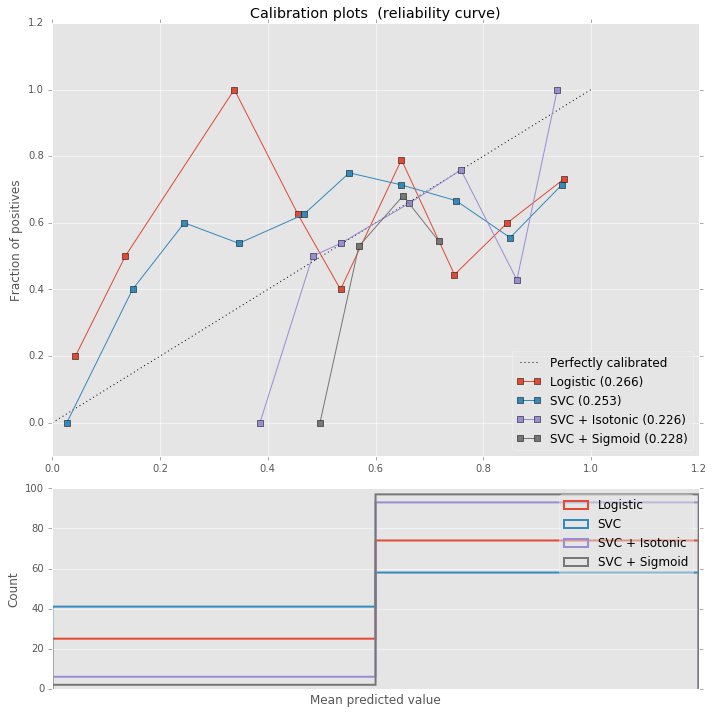

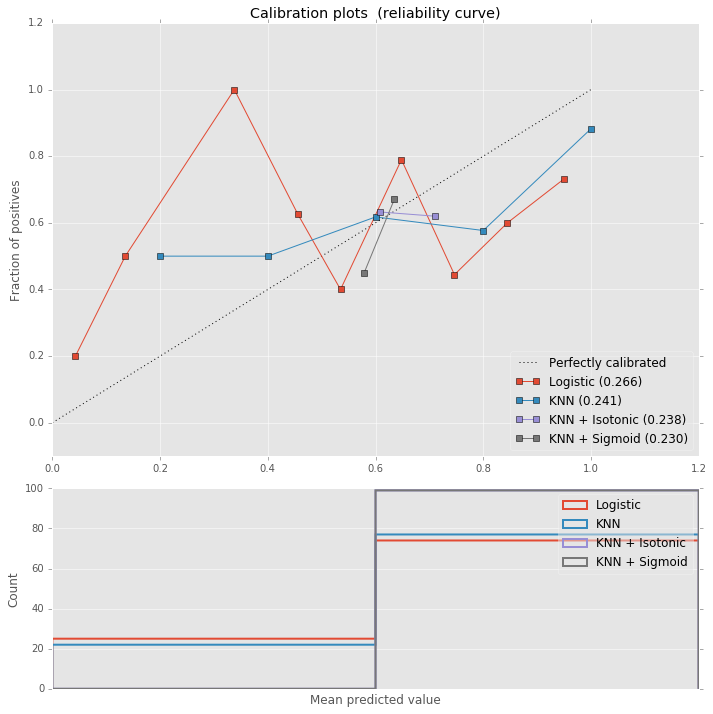

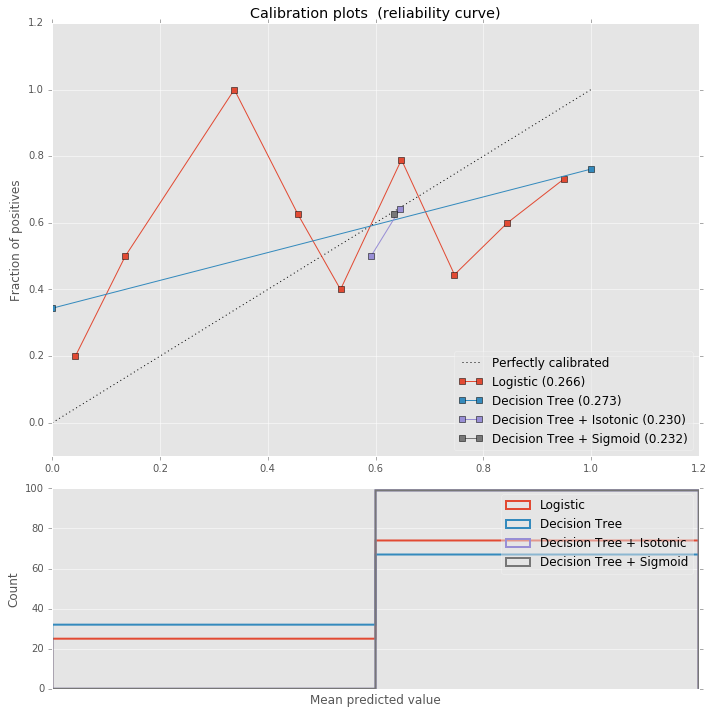

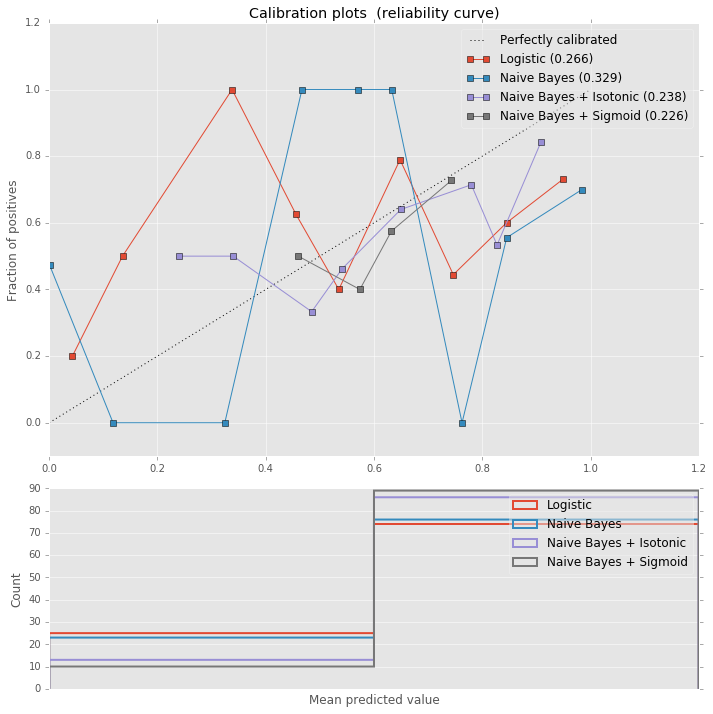

In [98]:
print(__doc__)

# Adapted from scikit learn documentation
# Original Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

# Create instances of training and testing data
# For simplicity purposes, I choose to use a training size of 95 and 
# mirror the test/ training data
# X_train_clf = X_train_100
# X_test_clf = X_test

# # Preprocess target labels to binary for easy manipulation
# y_train_clf = y_train_100.replace(['yes','no'],[1,0])
# y_test_clf = y_test.replace(['yes','no'],[1,0])

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train_cal, y_train_cal)
        y_pred = clf.predict(X_test_cal)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test_cal)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test_cal)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test_cal, 
                                     prob_pos, pos_label='yes')
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test_cal, y_pred, pos_label='yes'))
        print("\tRecall: %1.3f" % recall_score(y_test_cal, y_pred, pos_label='yes'))
        print("\tF1: %1.3f\n" % f1_score(y_test_cal, y_pred, pos_label='yes'))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test_cal, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=2, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.1, 1.2])
    ax1.set_xlim([0,1.2])
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.set_xticks([2])
    ax2.legend(loc='best', fancybox=True, framealpha=0.5)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 5)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 1)

# Plot calibration curve for K Nearest Neighbors Classifier
plot_calibration_curve(neighbors.KNeighborsClassifier(), "KNN", 2)

# Plot calibration curve for Decision Tree Classifier
plot_calibration_curve(tree.DecisionTreeClassifier(), "Decision Tree", 3)

plt.show()

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

ValueError: to_rgba: Invalid rgba arg "yes"
to_rgb: Invalid rgb arg "yes"
could not convert string to float: yes

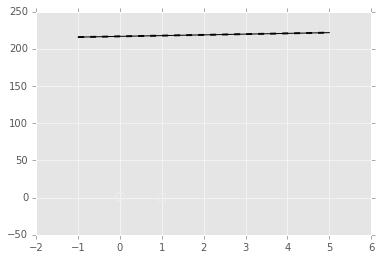

In [99]:
# clf_A.coef_
# clf_A. support_vectors_

np.random.seed(0)
tx = np.r_[np.random.randn(20, 2) - [2,2], np.random.randn(20,2) + [2,2]]
ty = [0] *20 + [1] *20

w = clf_A.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1,5)
yy = a * xx - (clf_A.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ **2))
b = clf_A.support_vectors_[0]
yy_down = yy + a * margin
yy_up = yy - a * margin
# yy_down = a * xx + (b[1] - a * b[0])
# b = clf_A.support_vectors_[-1]
# yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf_A.support_vectors_[:, 0], clf_A.support_vectors_[:, 1],
            s=80, facecolors='none', zorder=10)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test_cal, zorder=10, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

In [133]:
# Get our existing parameters
# print clf_A.get_params().keys()

from sklearn import svm


def svc_param_select(X, y):
    start = time()
    Cs = [1, 10, 100]
    gammas = [0.01, 0, 1, 0.07]
    ks = ['sigmoid', 'linear', 'rbf']
    coefs = [-100000000, -100, 0, 1, 100]
    deg = [1,2,4]
    param_grid = {'kernel': ks, 'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(SVC(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    end = time()
    print "Best parameters: {}\n Best estimator: {}\n Best score: {}\n".format(grid_search.best_params_,
                                                                               grid_search.best_estimator_,
                                                                              grid_search.best_score_,)
    print "Finished in {} seconds.".format(end-start)


svc_param_select(X_train, y_train)

Best parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 0.07}
 Best estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
 Best score: 0.722972972973

Finished in 41.9101040363 seconds.



Best parameters: {'kernel': 'rbf', 'C': 1.011111111111111, 'gamma': 0.09}

Best estimator: SVC(C=1.01111111111, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.09, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Training a SVC using a training set size of 95. . .
Trained model in 					0.0015
Made predictions on training set in: 			0.0010
F1 score for training set: 				1.0000
Made predictions on test set in: 			0.0012
F1 score for test set: 					0.7848

Training a SVC using a training set size of 195. . .
Trained model in 					0.0038
Made predictions on training set in: 			0.0034
F1 score for training set: 				0.9773
Made predictions on test set in: 			0.0020
F1 score for test set: 					0.7949

Training a SVC using a training set size of 295. . .
Trained model in 					0.0097
Made predictions on training set in: 			0.0059
F1 score for training set: 				0.9735
Made predictions

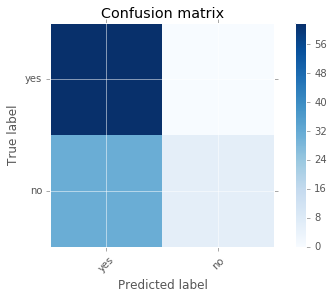

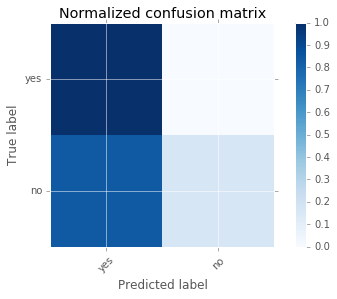

In [204]:
# TODO: Create the parameters list you wish to tune
# parameters = [{'C': [1, 10, 1000], 
#                'kernel': ['rbf'],
#               'degree': [0, 1, 3]}]
parameters = [{'C': [1, 0.99, 1.0001, 1.0111111111111111111111111],
               'gamma': [0.09, 0.009, 0.0999, 0.11, 0.1],
               'kernel': ['rbf']}]

# f1 scoring function using 'make_scorer'
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print "\nBest parameters: {}\n\nBest estimator: {}".format(grid_obj.best_params_,
                                                                               grid_obj.best_estimator_,)

print
clf_arr = [train_predict_noP(clf, X_train_100, y_train_100, X_test, y_test),
           train_predict_noP(clf, X_train_200, y_train_200, X_test, y_test),
           train_predict_noP(clf, X_train_300, y_train_300, X_test, y_test)]


print

# Report the final F1 score for training and testing after parameter tuning
train_pred_all(clf)

def compare_models(clf1, clf2):
    print "\t\t\t\t\t\t\tTuned Model \t\tOriginal Model\t\tDifference"
    print "Training Size"
    i=0
    sizes = 95, 195, 295
    
    while i<=2:
        
        print sizes[i]
        print "\tMade predictions on training set in: \t\t{:.4f}\t\t\t{:.4f}".format(clf1[i][1], clf2[i][1])
        print "\tChange in prediction time:\t\t\t\t\t\t\t\t\t{:.4f}%".format((clf2[i][1]-clf1[i][1])/clf2[i][1]*100)
        print "\tF1 score for training set: \t\t\t{:.4f}\t\t\t{:.4f}".format(clf1[i][2], clf2[i][2])
        print "\tChange in F1 score:\t\t\t\t\t\t\t\t\t\t{:.4f}%".format((clf1[i][1]-clf2[i][1])/clf1[i][1]*100)
        print "\tMade predictions on test set in: \t\t{:.4f}\t\t\t{:.4f}".format(clf1[i][3], clf2[i][3])
        print "\tChange in prediction time:\t\t\t\t\t\t\t\t\t{:.4f}%".format((clf2[i][1]-clf1[i][1])/clf2[i][1]*100)
        print "\tF1 score for test set: \t\t\t\t{:.4f}\t\t\t{:.4f}".format(clf1[i][4], clf2[i][4])
        print "\tChange in F1 score:\t\t\t\t\t\t\t\t\t\t{:.4f}%".format((clf1[i][1]-clf2[i][1])/clf1[i][1]*100)
        print
        i+=1

compare_models(clf_arr, clf_A_arr)

print "Tuned model has a training f1 score of {:.4f}".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing f1 score of {:.4f}".format(predict_labels(clf, X_test, y_test))

clf_report(clf)
plot_mat(clf)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

- The tuned model has a **training** f1 score of 0.9736 and a **testing** f1 score of 0.8000. 
- While the F1 score has **increased** from the untuned model by approximately 28%, the prediction and training time has **slowed** by approximately 39%

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.